<a href="https://colab.research.google.com/github/shubhM13/monzo_account_analytics/blob/main/colab_notebooks/account_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth

In [3]:
auth.authenticate_user()

In [5]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Create a BigQuery client
client = bigquery.Client(project='analytics-take-home-test')

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_mart.dim_account`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Display the DataFrame
df.head()


,AccountID,AccountOpenedFlag,AccountClosedFlag,AccountReopenedFlag,CreationDate,ClosureDate,ReopeningDate,CurrentStatus,AccountType
0,1D4fq1rphlOHSLX0nU9vCxIozd6am9Gxo4Y4BiWCBuZV5B...,True,False,False,2019-01-26,NaT,NaT,Open,None
1,+9l4PPXcdHN+TNJ3+axvZCRCOpPCvXFF34J71wxtBtWPV9...,True,False,False,2020-08-09,NaT,NaT,Open,None
2,aWGVwNpdUQYekIESVNjPhAN7mrAVphy57/VAkAI7O+UTlq...,True,False,False,2018-04-02,NaT,NaT,Open,uk_retail
3,eW6Du9b0d5BYUrAtu2TrlK2/w0lGdZn51IqgYW3WxcjioI...,True,False,False,2018-09-07,NaT,NaT,Open,uk_retail
4,ZOKD2CZ9tl9Lx6M+/LZSO1/sJP9r57/QTCoyAoiSt8DKUm...,True,False,False,2018-01-09,NaT,NaT,Open,uk_retail


# Account Status

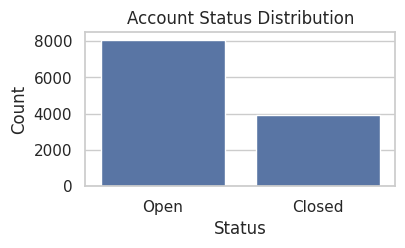

In [7]:
# Plot account status distribution
status_counts = df['CurrentStatus'].value_counts()
plt.figure(figsize=(4, 2))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Account Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Account Creation over Time

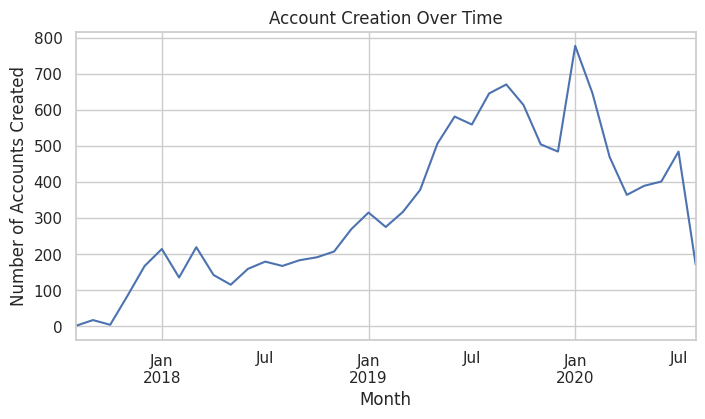

In [13]:
# Convert dates to datetime format
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

# Group by month and count the number of accounts created
monthly_creations = df['CreationDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(8, 4))
monthly_creations.plot(kind='line')
plt.title('Account Creation Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Created')
plt.grid(True)
plt.show()


# Account Closure over time

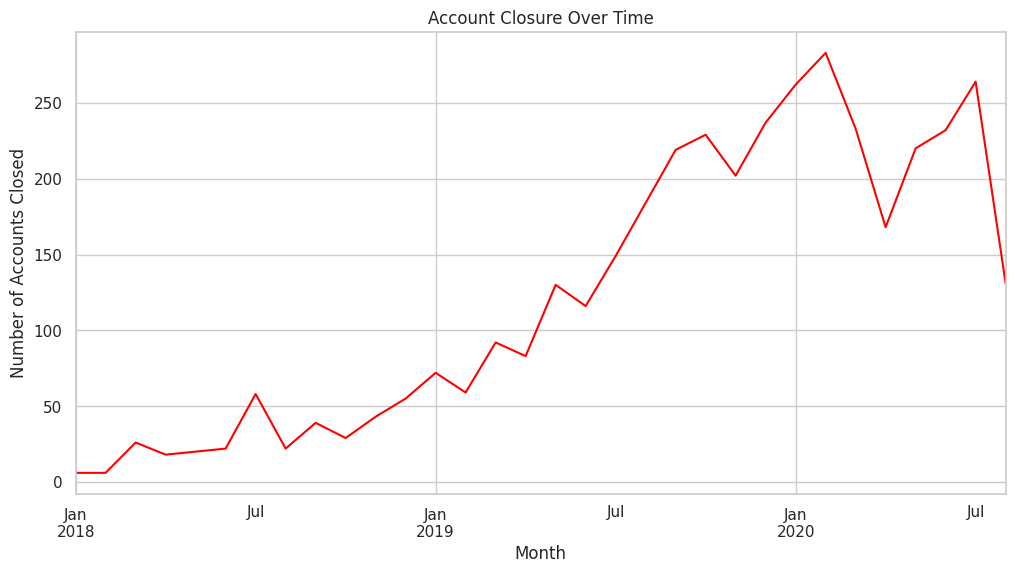

In [14]:
# Convert closure dates to datetime format
df['ClosureDate'] = pd.to_datetime(df['ClosureDate'])

# Filter out rows without closure dates
closed_accounts = df.dropna(subset=['ClosureDate'])

# Group by month and count the number of accounts closed
monthly_closures = closed_accounts['ClosureDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_closures.plot(kind='line', color='red')
plt.title('Account Closure Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Closed')
plt.grid(True)
plt.show()


# Account Reopening over time

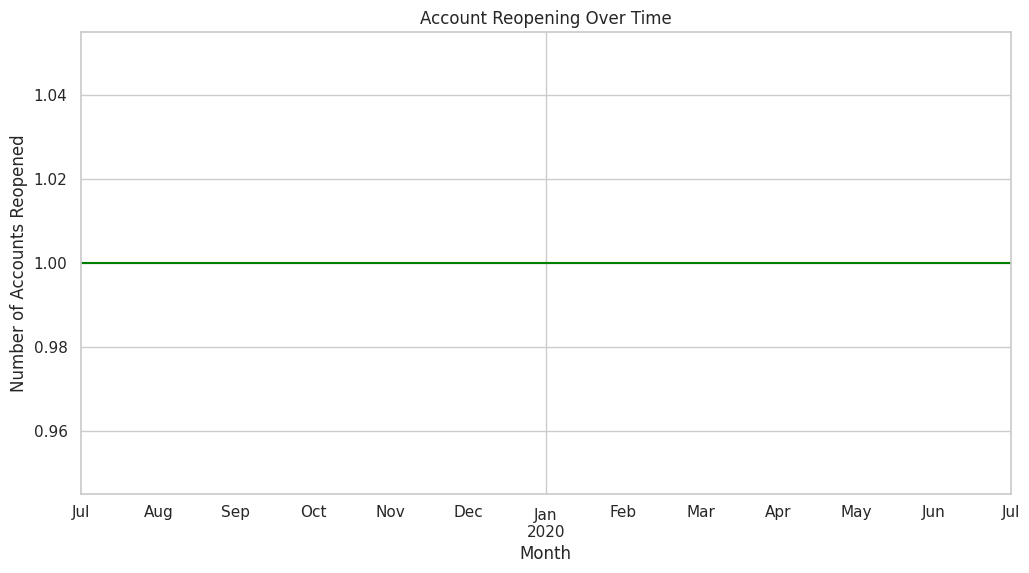

In [15]:
# Convert reopening dates to datetime format
df['ReopeningDate'] = pd.to_datetime(df['ReopeningDate'])

# Filter out rows without reopening dates
reopened_accounts = df.dropna(subset=['ReopeningDate'])

# Group by month and count the number of accounts reopened
monthly_reopenings = reopened_accounts['ReopeningDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_reopenings.plot(kind='line', color='green')
plt.title('Account Reopening Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Reopened')
plt.grid(True)
plt.show()


# Account Type Distribution

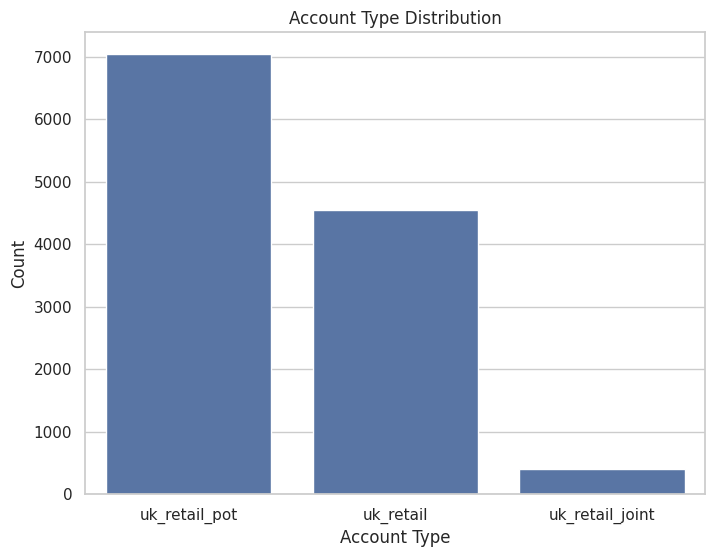

In [16]:
# Plot account type distribution
account_type_counts = df['AccountType'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=account_type_counts.index, y=account_type_counts.values)
plt.title('Account Type Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()


# Lifetime of closed account

<ipython-input-18-ee26df6aed39>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



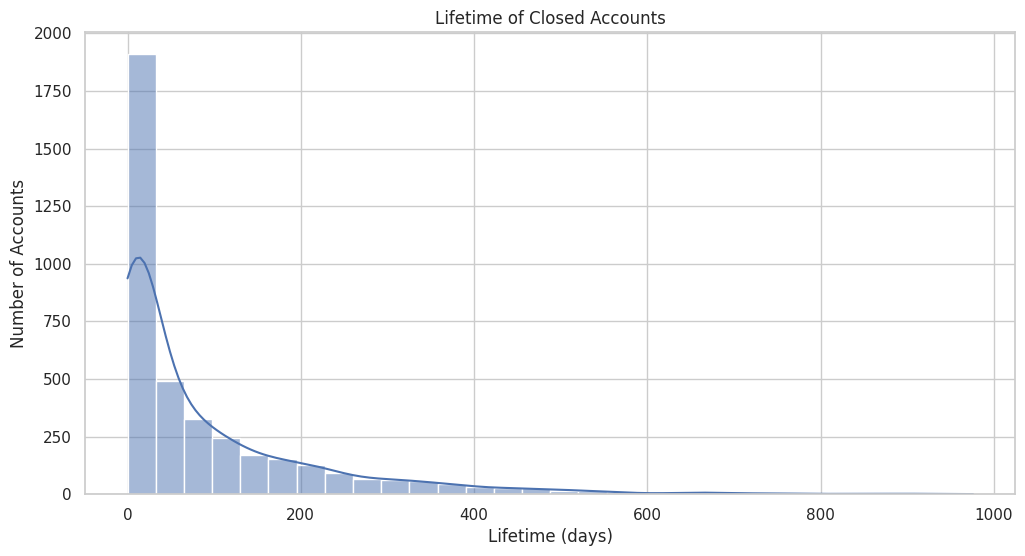

In [18]:
# Calculate the lifetime of closed accounts
df['ClosureDate'] = pd.to_datetime(df['ClosureDate'])
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
closed_accounts = df.dropna(subset=['ClosureDate'])
closed_accounts['Lifetime'] = (closed_accounts['ClosureDate'] - closed_accounts['CreationDate']).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(closed_accounts['Lifetime'], bins=30, kde=True)
plt.title('Lifetime of Closed Accounts')
plt.xlabel('Lifetime (days)')
plt.ylabel('Number of Accounts')
plt.show()


# Reopening Rate by Account Type

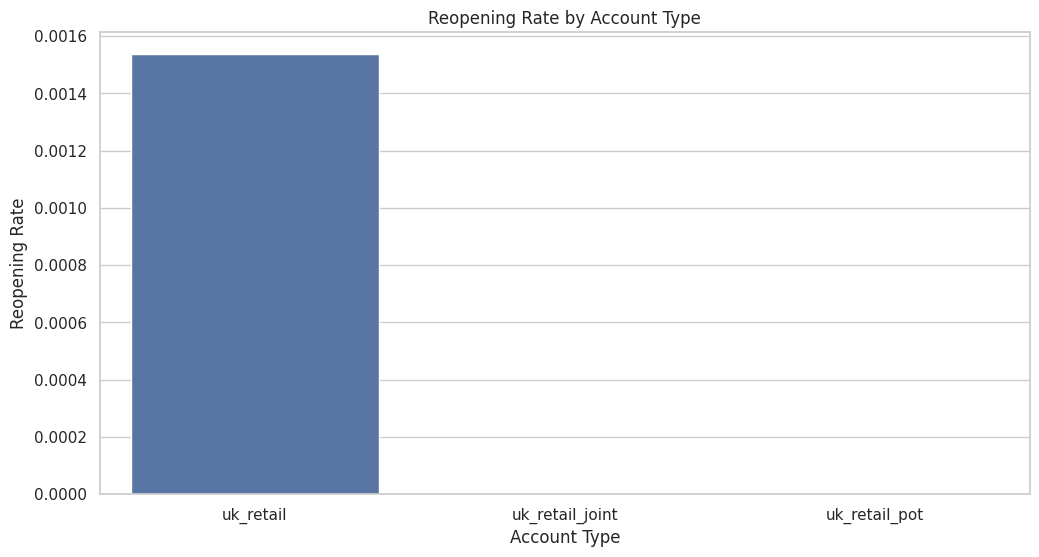

In [19]:
# Calculate reopening rates
reopening_rate = df.groupby('AccountType')['AccountReopenedFlag'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='AccountType', y='AccountReopenedFlag', data=reopening_rate)
plt.title('Reopening Rate by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Reopening Rate')
plt.show()